In [166]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly 
import plotly.express as px
import plotly.graph_objs as go
from IPython.display import Image

import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import norm

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV,cross_val_score, cross_val_predict
from sklearn import preprocessing, ensemble, metrics, tree, neighbors
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_log_error,mean_squared_error, make_scorer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Dataset Importation

In [167]:
df = pd.read_csv('OnlineNewsPopularity.csv',sep=",",encoding= 'unicode_escape')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Data Analysis

### Inspection of the dataset

In [168]:
df.shape

(39644, 61)

We can see that the dataset is composed of 39644 instances, each one defined by 61 attributes.

In [169]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


Analyse a faire

Let's now take a look at the instances.

In [170]:
df.isnull().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64

In [171]:
counter = 0
for i in range(len(df.isnull().sum())):
    if df.isnull().sum()[i] != 0:
        counter += 1
clean_variables = 61 - counter
print('Number of variables with no null value :', clean_variables)

Number of variables with no null value : 61


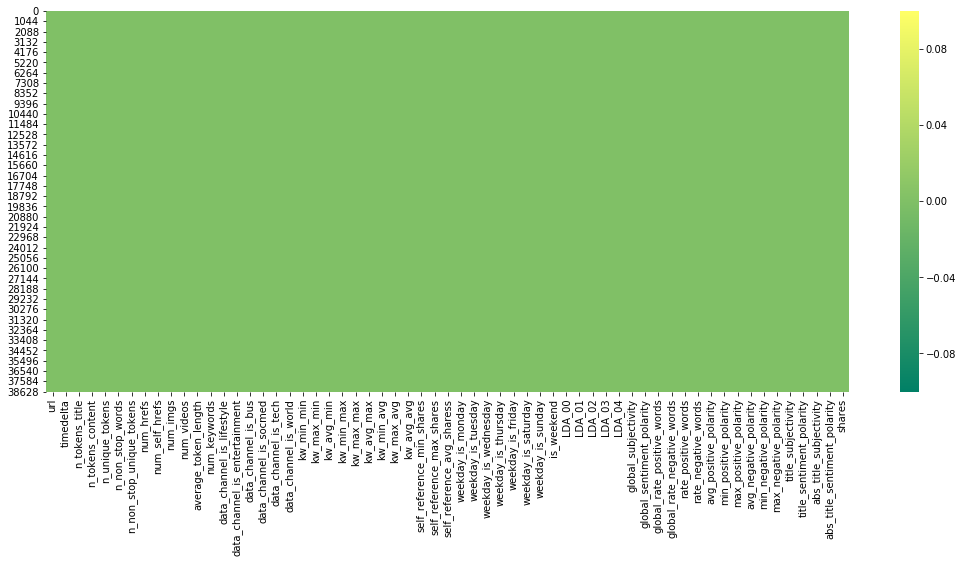

In [172]:
plt.figure(figsize=(18,7))
sns.heatmap(df.isnull(),cmap="summer")

In [173]:
df.duplicated().value_counts()

False    39644
dtype: int64

With these informations, we can affirm that the data is perfectly clean beacause there are no duplicated instances or null values.

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

Except the "url" attribute, all the attributes are already numeric values. Therefore, no modification to the attributes is needed. 

# Data-visualization

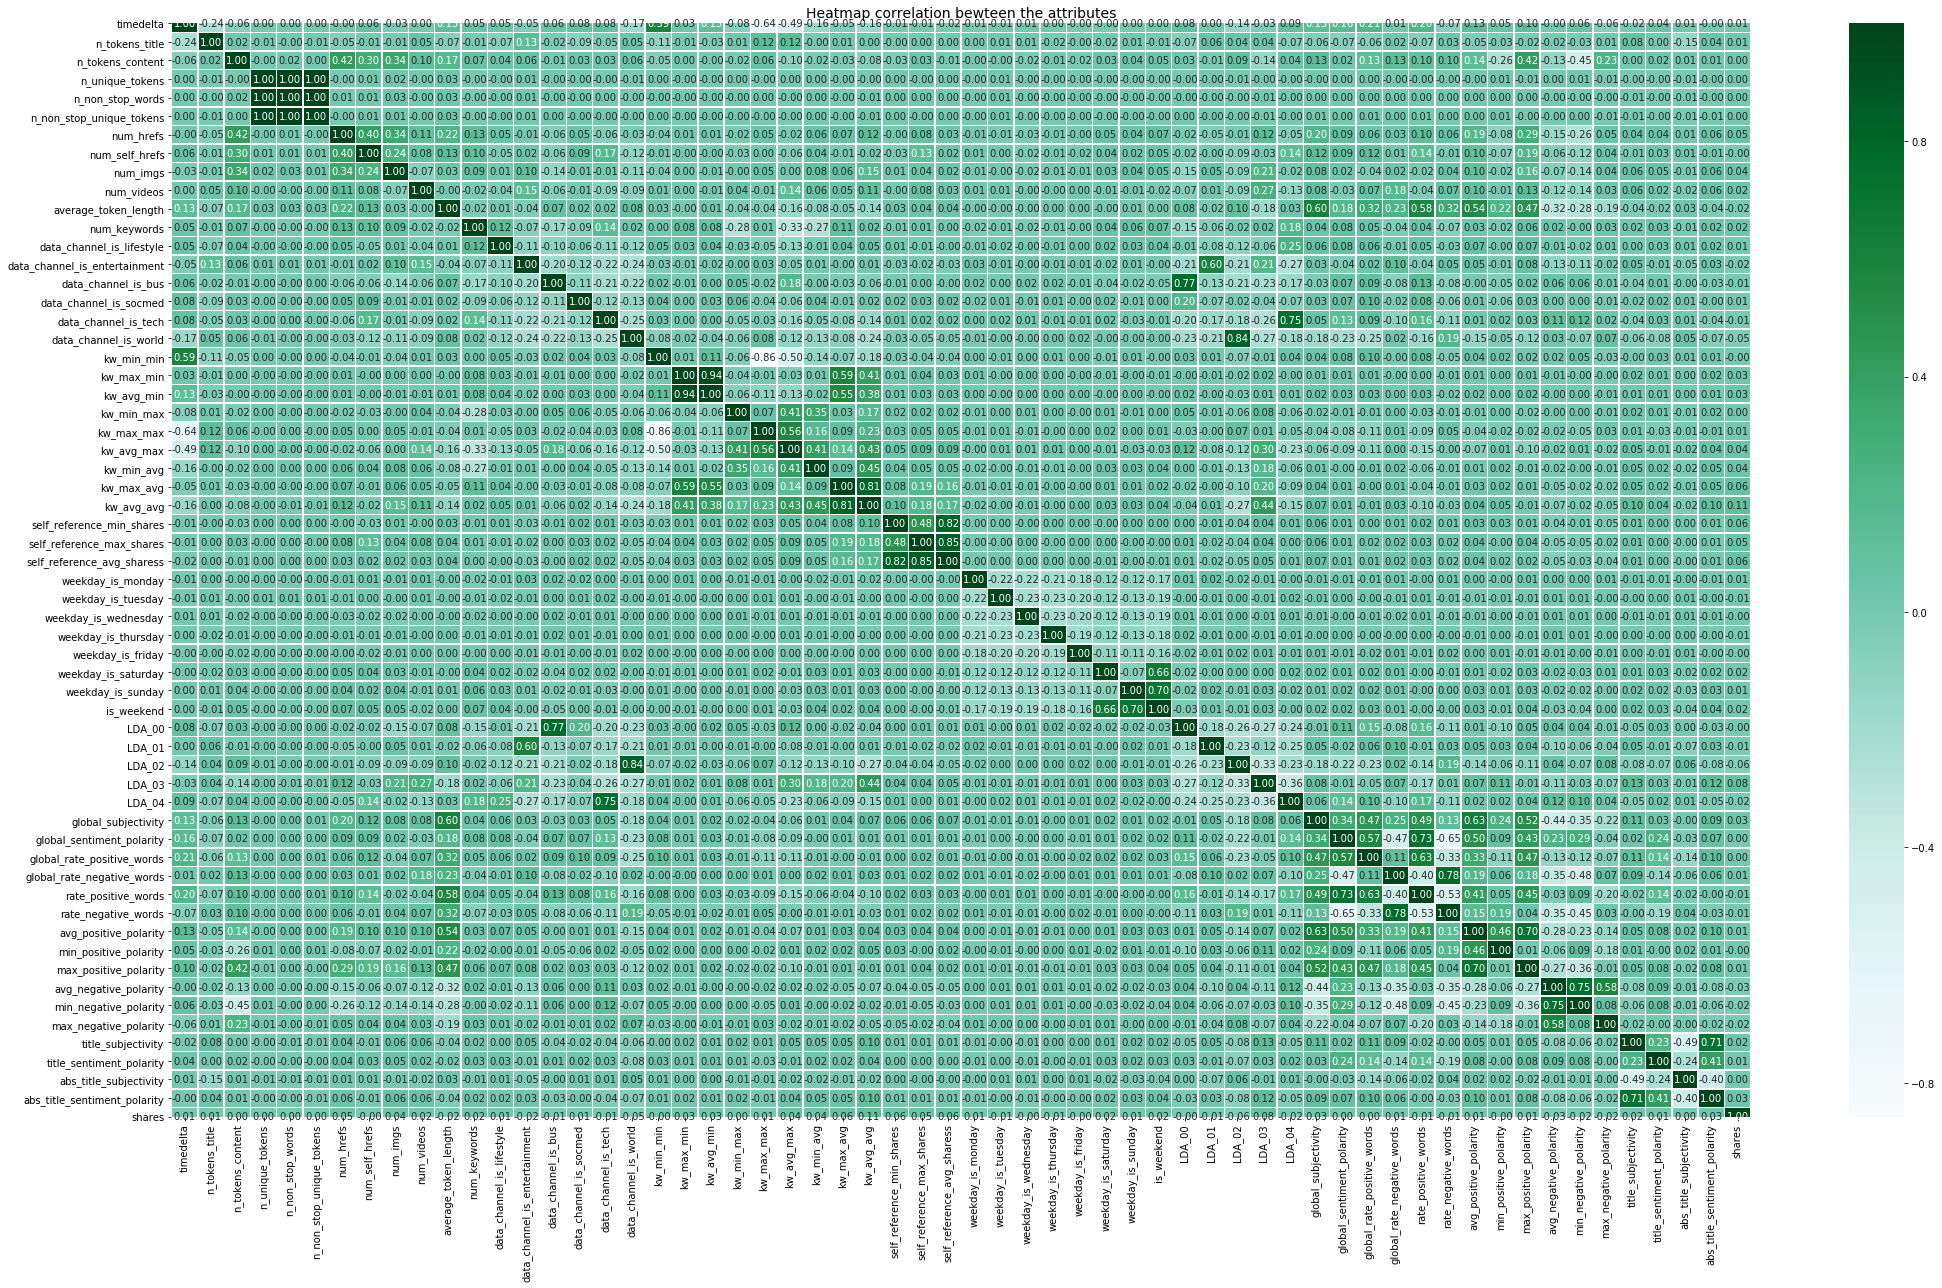

In [175]:
plt.subplots(figsize=(30,18))
sns.heatmap(df.corr(),cmap="BuGn",annot = True, cbar = True, linewidths=0.5,fmt='.2f')
plt.title("Heatmap correlation bewteen the attributes",fontsize=14)
plt.tight_layout()

Due to the high number of variables, the graphic is difficult to analyse. 
But if we zoom in, we can identify multiple highly correlated attributes (with the correlation value) : 
* n_unique_tokens & n_non_stop_words (1.00)
* n_unique_tokens &  n_non_stop_unique_tokens (1.00)
* n_non_stop_words & n_non_stop_unique_tokens (1.00)
* LDA_02 & data_channel_is_world (0.84)



Let's now take a look at the correlation between our target variable which is the number of shares and the others.

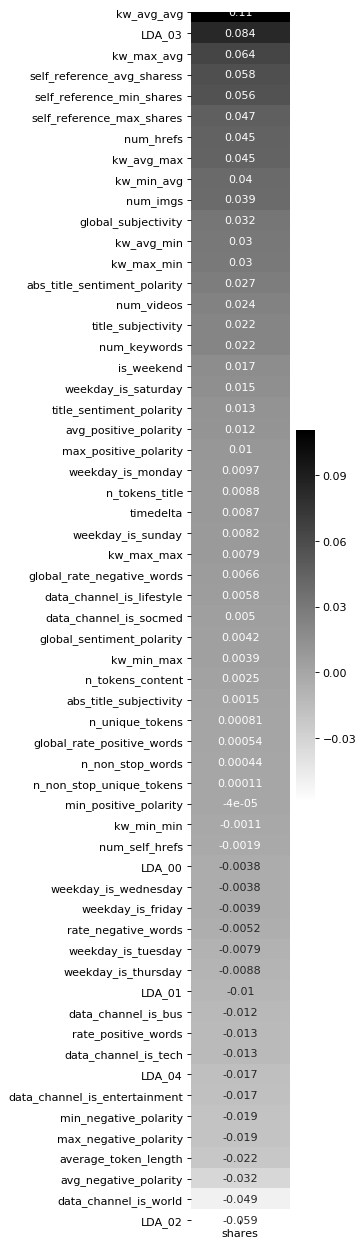

In [176]:
plt.figure(figsize=(2,20), dpi=80)
sns.heatmap(df.corr()[["shares"]].sort_values(by="shares", ascending=False)[1:],annot=True,cmap='binary')
plt.show()

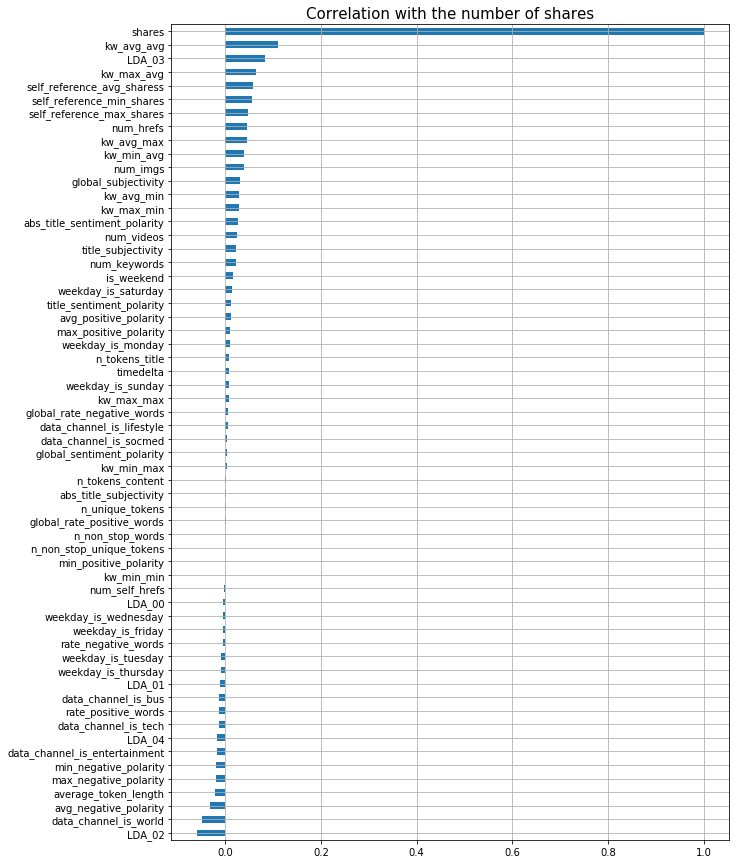

In [177]:
target_variable = round(df.corr().iloc[59].sort_values(), 3)
target_variable.plot(x = target_variable.index, y = target_variable.values, kind = "barh", figsize = (10,15),grid=True);
plt.title("Correlation with the number of shares",fontsize=15,fontweight="medium")
plt.show()

In [178]:
abs(df.corr()[["shares"]]).sort_values(by="shares", ascending=False)[1:]

,shares
kw_avg_avg,0.110413
LDA_03,0.083771
kw_max_avg,0.064306
LDA_02,0.059163
self_reference_avg_sharess,0.057789
self_reference_min_shares,0.055958
data_channel_is_world,0.049497
self_reference_max_shares,0.047115
num_hrefs,0.045404
kw_avg_max,0.044686


Based on the correlation between the attributes and the number of shares, the 10 variables that have the biggest influence on the number of shares are the following ones :
1. kw_avg_avg
2. LDA_03
3. kw_max_avg
4. LDA_02
5. self_reference_avg_sharess
6. self_reference_min_shares
7. data_channel_is_world
8. self_reference_max_shares
9. num_hrefs
10. kw_avg_max

We create a new attribute called 'day_of_week' which will replace all the seven 'weekday_is_...' attributes. Thus, the value of this variable is an integer between 0 and 6. Moreover, the value is affected by following a chronological order.

In [179]:
df["day_of_week"] = -1
df.loc[(df['weekday_is_monday'] == 1), 'day_of_week'] = 0
df.loc[(df['weekday_is_tuesday'] == 1), 'day_of_week'] = 1
df.loc[(df['weekday_is_wednesday'] == 1), 'day_of_week'] = 2
df.loc[(df['weekday_is_thursday'] == 1), 'day_of_week'] = 3
df.loc[(df['weekday_is_friday'] == 1), 'day_of_week'] = 4
df.loc[(df['weekday_is_saturday'] == 1), 'day_of_week'] = 5
df.loc[(df['weekday_is_sunday'] == 1), 'day_of_week'] = 6

We also create a variable called 'data_channel_theme' which is a string that allows us to know the theme of the channel from which the article is from

In [180]:
df["data_channel_theme"] = 'Undefined'
df.loc[(df['data_channel_is_lifestyle'] == 1), 'data_channel_theme'] = 'Lifestyle'
df.loc[(df['data_channel_is_entertainment'] == 1), 'data_channel_theme'] = 'Entertainment'
df.loc[(df['data_channel_is_bus'] == 1), 'data_channel_theme'] = 'Business'
df.loc[(df['data_channel_is_socmed'] == 1), 'data_channel_theme'] = 'Social Media'
df.loc[(df['data_channel_is_tech'] == 1), 'data_channel_theme'] = 'Tech'
df.loc[(df['data_channel_is_world'] == 1), 'data_channel_theme'] = 'World'

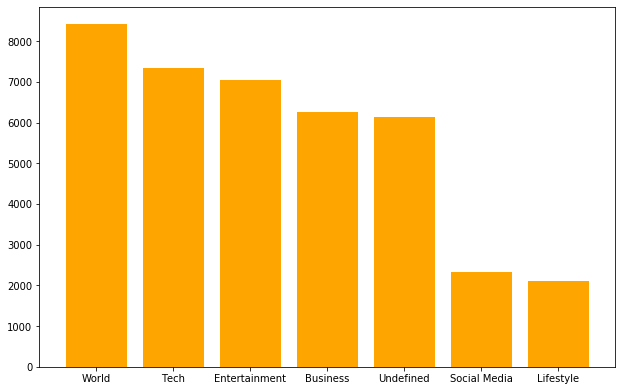

In [181]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df["data_channel_theme"].value_counts().index,df["data_channel_theme"].value_counts(),color = "orange")
plt.show()

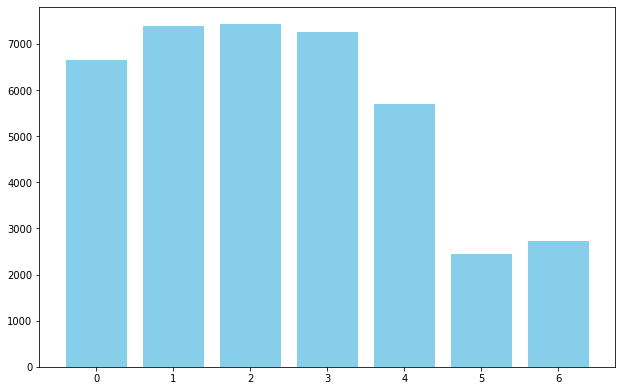

In [182]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df["day_of_week"].value_counts().index,df["day_of_week"].value_counts(),color = "skyblue")
plt.show()


In [183]:
df = df.drop(columns=['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday',
        'weekday_is_friday','weekday_is_saturday','weekday_is_sunday','url'])

In [184]:
df.loc[(df['data_channel_theme'] == 'Undefined'), 'data_channel_theme'] = -1
df.loc[(df['data_channel_theme'] == 'Lifestyle'), 'data_channel_theme'] = 0
df.loc[(df['data_channel_theme'] == 'Entertainment'), 'data_channel_theme'] = 1
df.loc[(df['data_channel_theme'] == 'Business'), 'data_channel_theme'] = 2
df.loc[(df['data_channel_theme'] == 'Social Media'), 'data_channel_theme'] = 3
df.loc[(df['data_channel_theme'] == 'Tech'), 'data_channel_theme'] = 4
df.loc[(df['data_channel_theme'] == 'World'), 'data_channel_theme'] = 5

In [185]:
df = df.drop(columns=['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed',
        'data_channel_is_tech','data_channel_is_world'])

# Selection of the relevant attributes

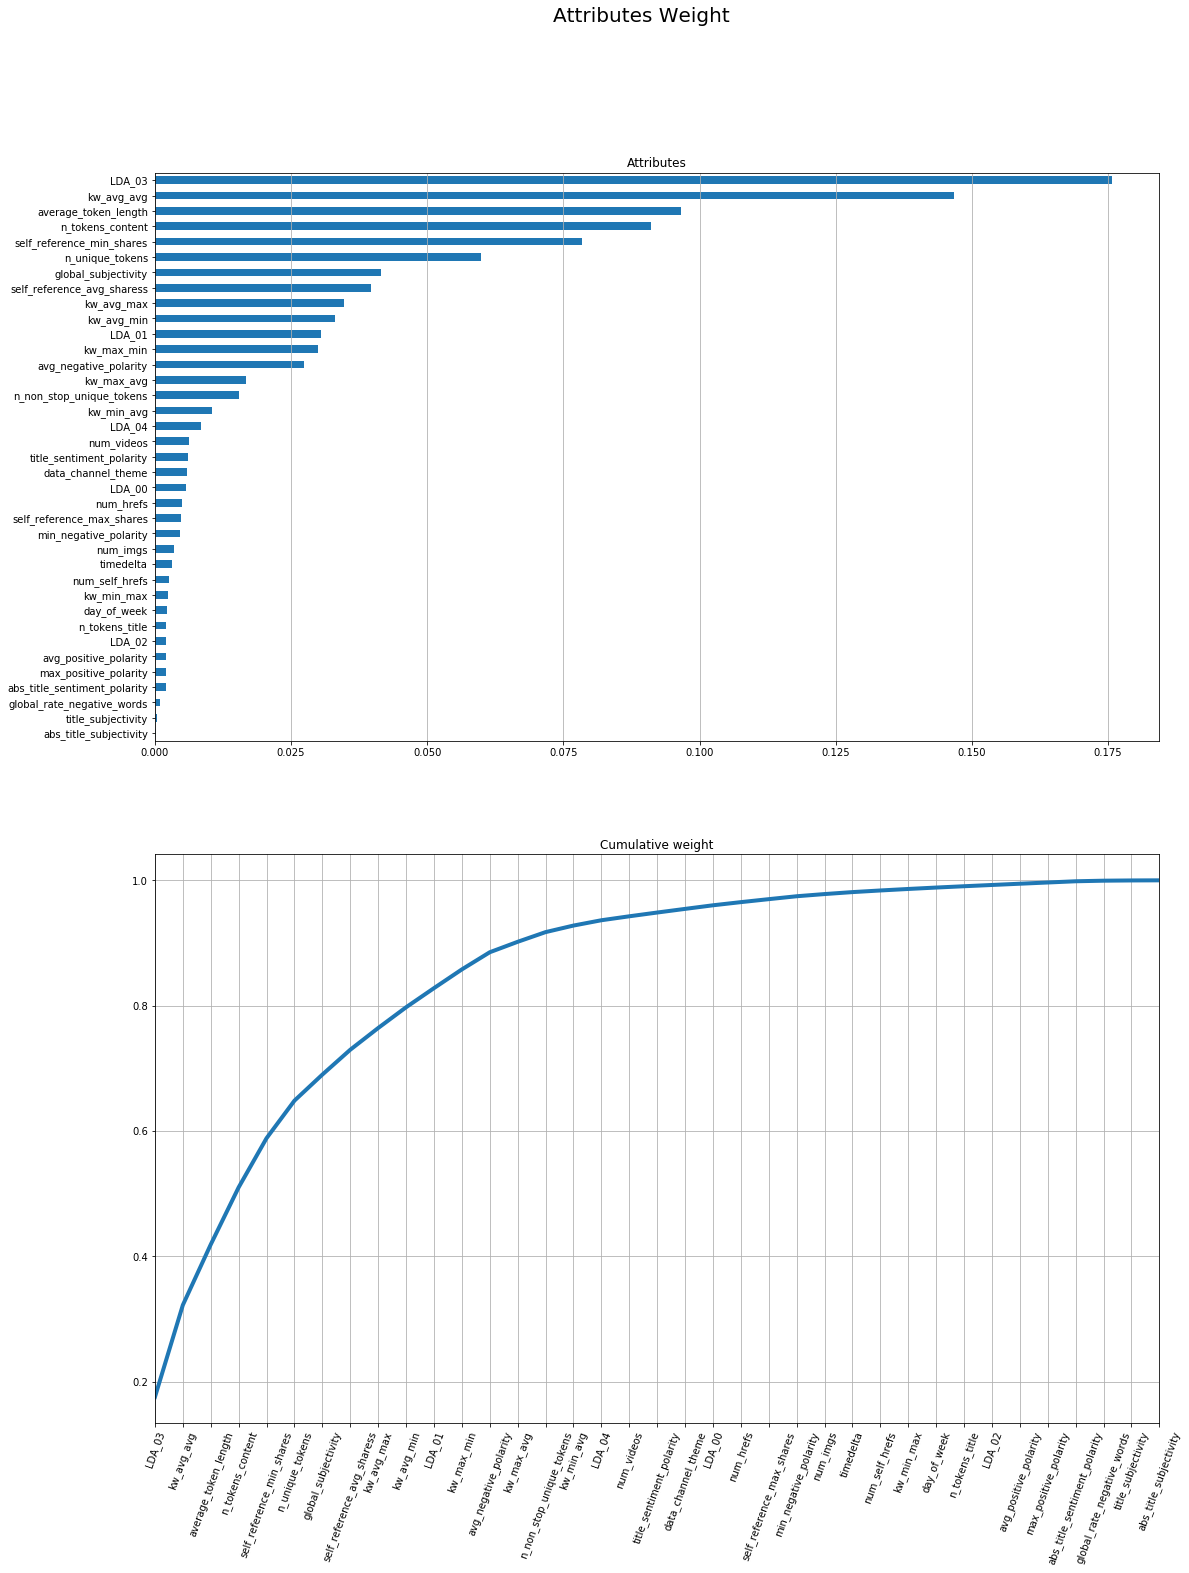

In [207]:
#Split the data set
X = df.drop("shares", axis=1).values
Y = df["shares"].values
attributes = df.drop("shares", axis=1).columns.tolist()

model = ensemble.GradientBoostingRegressor()

model.fit(X,Y)
weights = model.feature_importances_
df_weights = pd.DataFrame({"WEIGHTS":weights,"ATTRIBUTES":attributes}).sort_values("WEIGHTS",ascending=False)
df_weights['cumsum'] = df_weights['WEIGHTS'].cumsum(axis=0)
df_weights = df_weights.set_index("ATTRIBUTES")

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False,figsize=(18,23))
fig.suptitle("Attributes Weight", fontsize=20)
ax[0].title.set_text('Attributes')
df_weights[["WEIGHTS"]].sort_values(by="WEIGHTS").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('Cumulative weight')
df_weights[["cumsum"]].plot(kind="line", linewidth=4,legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(df_weights)),xticklabels=df_weights.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [190]:
attributes = ['shares','LDA_03','kw_avg_avg','average_token_length','n_tokens_content','kw_avg_min','self_reference_min_shares','n_unique_tokens',
'self_reference_avg_sharess','kw_max_min','avg_negative_polarity','n_non_stop_unique_tokens','global_subjectivity','kw_max_avg',
'abs_title_subjectivity','LDA_01','kw_min_avg','LDA_02','kw_avg_max','LDA_04','title_sentiment_polarity','self_reference_max_shares',
'data_channel_theme','LDA_00','num_hrefs','timedelta','num_imgs','num_videos','kw_min_max','abs_title_sentiment_polarity',
'max_positive_polarity','min_negative_polarity','num_self_hrefs','avg_positive_polarity','global_rate_negative_words',
'day_of_week','n_tokens_title','title_subjectivity']
df = df[attributes]
X = df.drop("shares", axis=1).values
y = df["shares"].values

In [191]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=15)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [208]:
performances = {}

def prediction (model):
    
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  R2 = round(model.score(X_test,y_test),3)
  ajd_R2 = round(1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),3)
  RMSE = round (np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3)
  performances[str(model)] = [R2]

  fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(25,6))
  sns.regplot(x=y_pred, y=y_test, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"},ax=axs[0])
  axs[0].set_xlabel('Predicted')
  axs[0].set_ylabel('Real')
  box = '\n'.join(("R²: "+ str(R2), "adj R²: "+str(ajd_R2), "RMSE: "+str(RMSE)))
  axs[0].text(200, 3100, box, fontsize=12, va='top', ha="left", bbox=dict(boxstyle='round', alpha=2))
  axs[0].set(title="Real vs predicted values")

  axs[1].plot(y_test,label="Real data")
  axs[1].plot(y_pred,label="Predicted values")
  axs[1].legend(loc="best")
  axs[1].set(title="Real vs Predicted values")
    
def optimal_parameters (model,parameters):
  grid = GridSearchCV(model,parameters,cv=5,verbose=0)
  grid.fit(X_train,y_train)
  return grid.best_estimator_,grid.best_score_

# Linear Regression

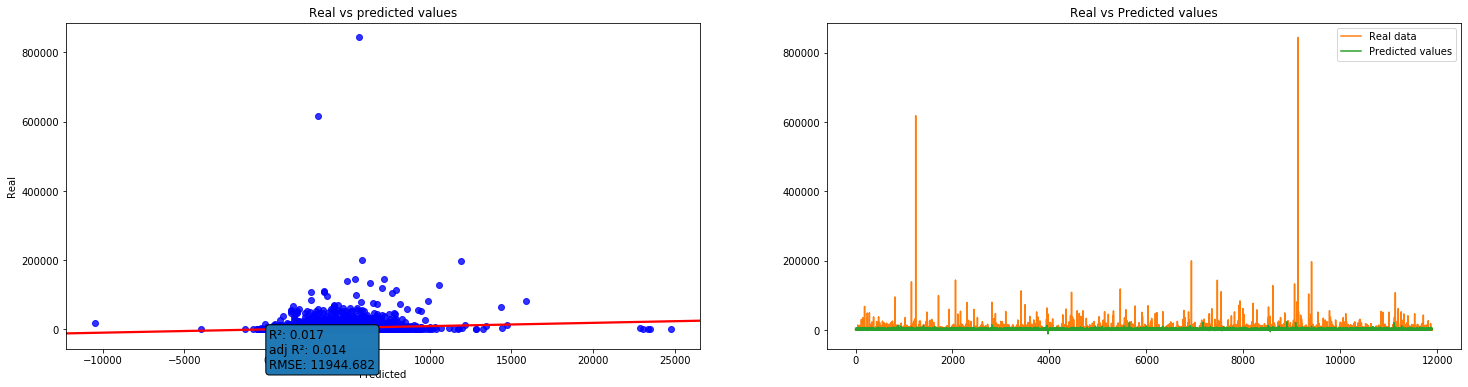

In [209]:
prediction(LinearRegression())

In [ ]:
rforest = RandomForestRegressor(n_estimators=750,max_depth=None)
prediction(rforest)

# KNN

In [205]:
parameters = {'n_neighbors':[1,3,5]}
knn = neighbors.KNeighborsRegressor()
opti_params = optimal_parameters(knn,parameters)
opti_params

(KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), -0.11544683271721254)

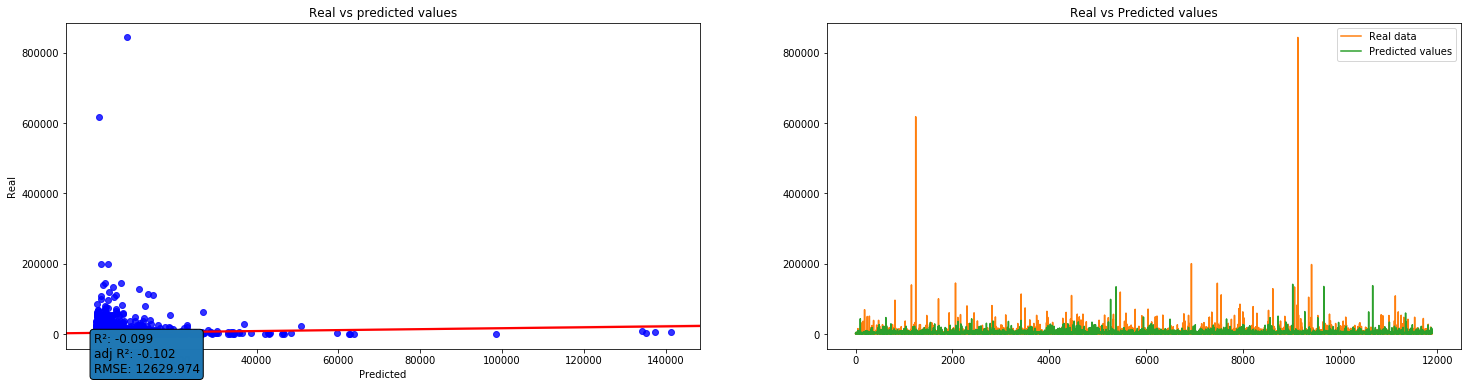

In [210]:
knn = neighbors.KNeighborsRegressor(5)
prediction(knn)

# Adaboost

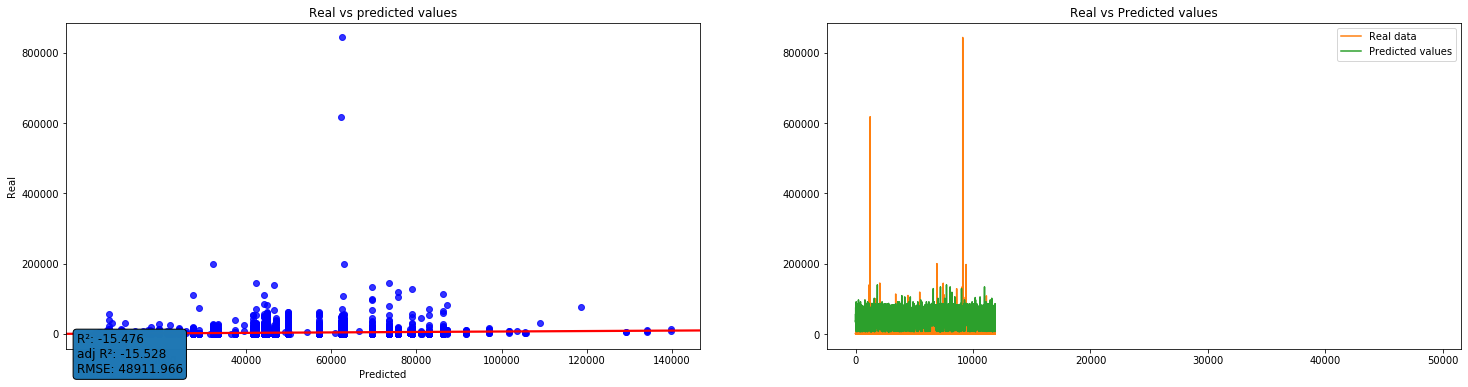

In [211]:
ada = AdaBoostRegressor()
prediction(ada)

## Performances

In [212]:
performances

{'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)': [0.017],
 "KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',\n                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,\n                    weights='uniform')": [-0.099],
 "AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',\n                  n_estimators=50, random_state=None)": [-15.476]}